## TSM with GA|مسئله دوره گرد با الگوریتم ژنتیکی

### کتابخانه های استفاده شده 

In [80]:
from random import randint as rnd
from random import shuffle
from math import sqrt
from copy import deepcopy

### پارامتر های مدل

در اینجا پارامترها و خواسته های مسئله را مشخص کنید، این پارامترها شامل موارد زیر هستند
1. تعداد شهر
2. طول و عرض ناحیه 
3. تعداد جمعیت هر مرحله
4. تعداد تکرار



In [120]:
number_of_cities = 10
area_wedth = 100
area_hight = 100

population_size =10
itreration = 100

## توابع استفاده شده

In [17]:
def city_location_generator(n_c, a_w, a_h):
    cities_location = []
    while len(cities_location) != n_c:
        city_location = [rnd(0,a_w), rnd(0, a_h)]
        if city_location not in cities_location:
            cities_location.append(city_location)
    return cities_location

####   تابع ساخت جمعیت اولیه | init_population

In [4]:
def init_population (number_of_cities, population_size):
    populaton_list=[]
    cities = [i for i in range(number_of_cities)]
    for i in range(population_size):
        shuffle(cities)
        cities += [None]
        populaton_list.append(cities)
        cities = cities[:-1]
    return populaton_list

#### تابع ایجاد نسل بعد و ایجاد جهش | cross_over & mutation ##

در فاز اول باید نسل جدید را ایجاد کنیم

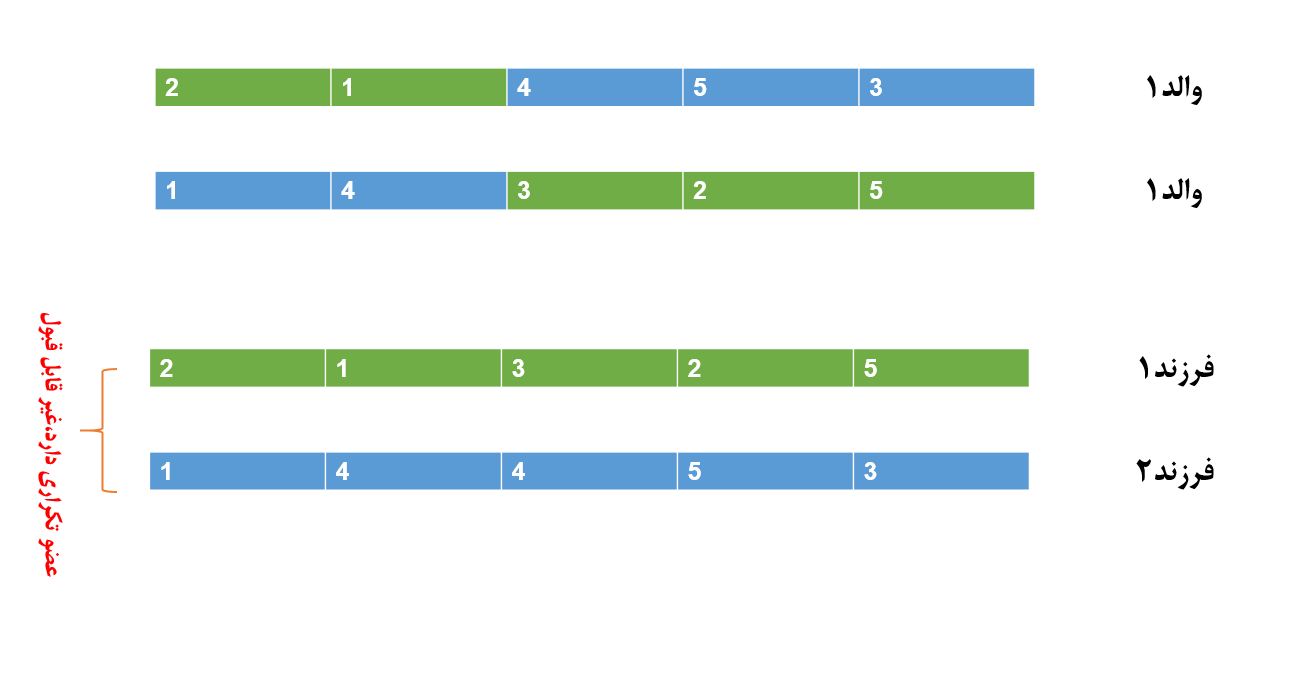

In [ ]:
به دلیل آنکه هر عدد باید یکبار در هر کروموزوم تکرار شود .این محدودیت باعث میشود زاد و ولد منجر به ایجاد فرزند جدید نشود و فقط پدر و مادر تکرار شده اند  

در مسئله ما چون فرزندها همان تکرار پدر و مادر هستند نرخ جهش را 100 درصد میگیریم تا سریعتر به جواب برسیم

In [111]:
def joiner(old_pop , yong_pop):
    return old_pop+yong_pop
def mutation(current_population, number_of_cities, population_size):
    old_pop = deepcopy(current_population)
    length = population_size
    i = 0
    while i < length:
        cell_1 = rnd(0,number_of_cities-1)
        cell_2 = rnd(0,number_of_cities-1)
        if cell_1 != cell_2:
            #print(current_population[i])
            current_population[i][cell_1], current_population[i][cell_2] = current_population[i][cell_2], current_population[i][cell_1]
            current_population[i][-1] = None
            i+=1
    current_population = joiner(old_pop, current_population)
    return current_population

In [114]:
#تبدیل مسیر به لوکیشن عرض و مبدا جغرافیایی
def cordination (city_location, path):
    cordination = [city_location[i] for i in path]
    return cordination  

#تبدیل لوکیشن به فاصله کل شهرها از هم
def total_distance_of_cities(cordination_):
    distance = 0
    for i in range(len(cordination_)-1):
        distance += sqrt(((cordination_[i][0]-cordination_[i+1][0])**2)+ ((cordination_[i][1]-cordination_[i+1][1])**2))
        #چون مینیموم سازی است و  الگوریتم ژنتیک ماکزیمم سازی انجام میدهد.مقدار را تقسیم بر یک کرده ایم
    #distance = 1/distance
    return distance
        
#محاسبه فیتنس
def fitness(population_list, city_location):
    for e,i in enumerate(population_list):
        if i[-1] == None:
            distance =total_distance_of_cities(cordination(city_location, i[:-1]))
            i[-1] = int(distance)
    return population_list

In [112]:
def sorter(current_population_list):
    current_population_list.sort(key= lambda x:x[-1])
    return current_population_list

In [121]:
if __name__ == "__main__":
    cities_locations = city_location_generator(number_of_cities, area_wedth, area_hight)
    current_population = init_population(number_of_cities, population_size)
    
    for i in range(1,itreration+1):
        current_population = mutation(current_population,number_of_cities, population_size)
        current_population = fitness(current_population, cities_locations)
        current_population = sorter(current_population)
        current_population = current_population[:population_size]
        print("the best answer so far is",current_population[0])
    
    print("the best answer  is",current_population[0])

the best answer so far is [8, 5, 6, 9, 0, 3, 4, 7, 1, 2, 427]
the best answer so far is [8, 2, 6, 4, 9, 3, 0, 5, 1, 7, 421]
the best answer so far is [8, 6, 7, 5, 0, 3, 9, 4, 1, 2, 391]
the best answer so far is [8, 6, 7, 5, 0, 3, 9, 4, 1, 2, 391]
the best answer so far is [8, 6, 7, 5, 0, 3, 9, 4, 2, 1, 350]
the best answer so far is [8, 6, 7, 5, 0, 3, 9, 4, 2, 1, 350]
the best answer so far is [8, 6, 7, 5, 0, 3, 9, 4, 2, 1, 350]
the best answer so far is [8, 6, 7, 5, 0, 3, 9, 4, 2, 1, 350]
the best answer so far is [8, 6, 7, 5, 4, 3, 9, 0, 2, 1, 342]
the best answer so far is [8, 6, 7, 5, 4, 3, 9, 0, 2, 1, 342]
the best answer so far is [8, 6, 7, 5, 4, 3, 9, 0, 2, 1, 342]
the best answer so far is [8, 5, 7, 6, 0, 3, 9, 4, 2, 1, 336]
the best answer so far is [8, 5, 7, 6, 0, 3, 9, 4, 2, 1, 336]
the best answer so far is [8, 5, 7, 6, 0, 3, 9, 4, 2, 1, 336]
the best answer so far is [8, 5, 7, 6, 0, 3, 9, 4, 2, 1, 336]
the best answer so far is [8, 5, 7, 6, 3, 4, 9, 0, 2, 1, 333]
the best

In [ ]:
l=[1,2,3]
l.sort()